# Plot submissions per Coordinator

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
%matplotlib inline

In [2]:
date = '2024-10-30'

In [3]:
df = pd.read_csv('submissions_per_coordinator_{}.csv'.format(date), index_col='collaboration', usecols=['collaboration', 'version', 'number_todo', 'number_finished'])

In [4]:
df.head()

,version,number_todo,number_finished
collaboration,,,
A2 at MAMI,1,0,17
A2 at MAMI,2,0,0
AEgIS,1,0,0
AEgIS,2,0,0
ALEPH on behalf of MIT/Harvard/NTU/INFN analysis group,1,0,2


Rename columns and drop `Geant4` and `IPPP Durham` collaborations.

In [5]:
df.rename(columns={'number_todo': 'In progress', 'number_finished': 'Finished'}, inplace=True)

In [6]:
df = df.drop(['Geant4', 'IPPP Durham'])

Drop rows with no submissions in progress or finished.

In [7]:
df = df[(df['In progress'] != 0) | (df['Finished'] != 0)]

Count number of submissions with a version 2.

In [8]:
df2 = df[df['version'] == 2]
del df2['version']

In [9]:
df2.sum()

In progress     11
Finished       269
dtype: int64

Only keep version 1 of submissions.

In [10]:
df = df[df['version'] == 1]
del df['version']

Aggregrate per LHC experiment (ALICE, ATLAS, CMS, LHCb, Other).

In [11]:
df['Experiment'] = ''
for collaboration in df.index.tolist():
    if 'ALICE' in collaboration:
        df.loc[collaboration, 'Experiment'] = 'ALICE'
    elif 'ATLAS' in collaboration:
        df.loc[collaboration, 'Experiment'] = 'ATLAS'
    elif 'CMS' in collaboration:
        df.loc[collaboration, 'Experiment'] = 'CMS'
    elif 'LHCb' in collaboration:
        df.loc[collaboration, 'Experiment'] = 'LHCb'
    else:
        df.loc[collaboration, 'Experiment'] = 'Non-LHC'

In [12]:
df_experiment = df.groupby('Experiment').sum()

In [13]:
df_experiment

,In progress,Finished
Experiment,,
ALICE,3,312
ATLAS,75,466
CMS,69,548
LHCb,7,40
Non-LHC,50,669


In [14]:
df_experiment.sum()

In progress     204
Finished       2035
dtype: int64

Shorten collaboration names.

In [15]:
df = df.rename(index={
    'ALEPH on behalf of MIT/Harvard/NTU/INFN analysis group': 'ALEPH',
    'ANKE experiment at COSY': 'ANKE',
    'ATLAS - B-physics and Light States': 'BPHY',
    'ATLAS Exotics Group': 'EXOT',
    'ATLAS Heavy Ions': 'HION',
    'ATLAS Higgs and DiBoson Search Group': 'HDBS',
    'ATLAS Higgs group': 'HIGG',
    'ATLAS Muon Combined Performance group': 'MUON',
    'ATLAS Standard Model': 'STDM',
    'ATLAS SUSY': 'SUSY',
    'ATLAS/TileCal': 'TILE',
    'ATLAS top quark working group': 'TOPQ',
    'ATLAS Trigger Group': 'TRIG',
    'CLAS Collaboration': 'CLAS',
    'CMS Beyond Two Generations': 'B2G',
    'CMS B Physics': 'BPH',
    'CMS Exotica Group': 'EXO',
    'CMS Forward and Small-x QCD Physics': 'FSQ',
    'CMS Heavy-Ion Physics': 'HIN',
    'CMS Higgs Physics': 'HIG',
    'CMS Standard Model Physics': 'SMP',
    'CMS Supersymmetry': 'SUS',
    'CMS/Top quark physics analysis group': 'TOP',
    'HERA experiments': 'HERA',
    'Snowmass pMSSM scan': 'Snowmass',
    'STAR Collaboration': 'STAR'
})

In [16]:
df

,In progress,Finished,Experiment
collaboration,,,
A2 at MAMI,0,17,Non-LHC
ALEPH,0,2,Non-LHC
ALICE,3,312,ALICE
ANKE,0,1,Non-LHC
BPHY,0,6,ATLAS
EXOT,14,99,ATLAS
HION,7,35,ATLAS
HDBS,8,52,ATLAS
HIGG,8,54,ATLAS


Make a bar chart (In progress, Finished) of submissions for each of five classes of experiment (ALICE, ATLAS, CMS, LHCb, Non-LHC), then giving the breakdown for Non-LHC, ATLAS and CMS.  Make a single plot with four subplots.

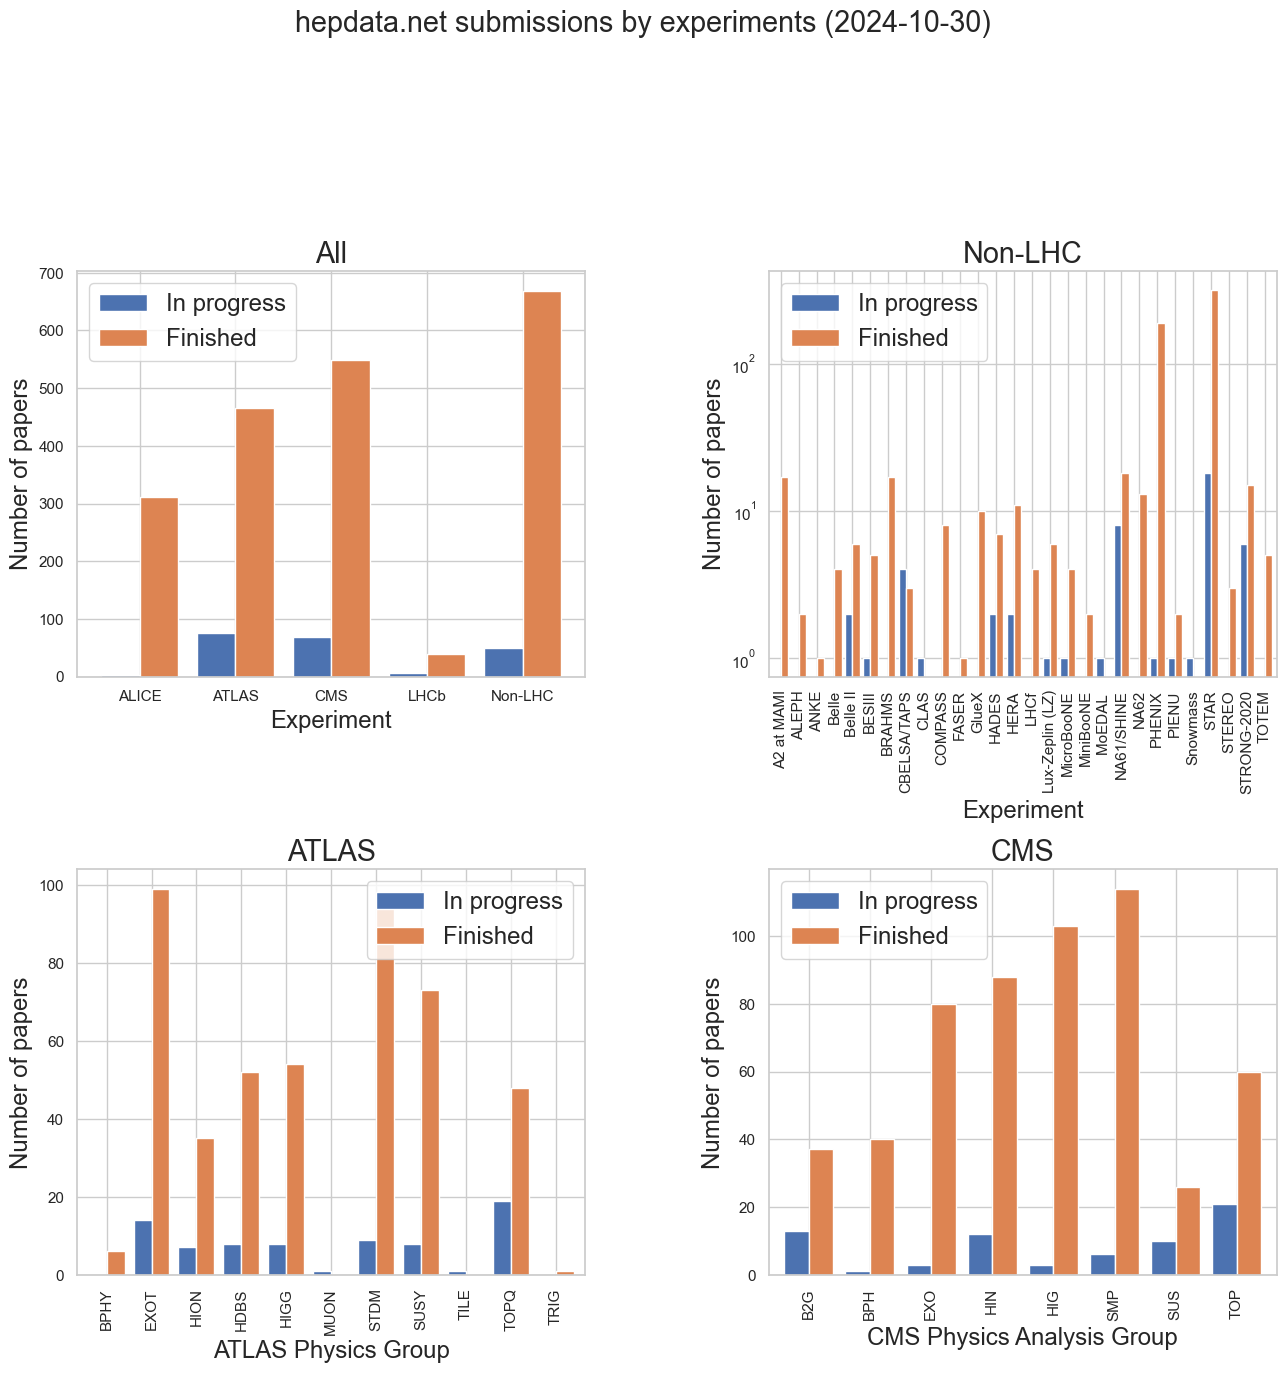

In [17]:
experiments = ['All', 'Non-LHC', 'ATLAS', 'CMS']
plt.figure(facecolor='white', figsize=(15,15))
for sub in range(1, 5):
    ax = plt.subplot(2, 2, sub)
    experiment = experiments[sub-1]
    if experiment == 'All':
        df_experiment.plot(kind='bar', rot=0, ax=ax, width=0.8)
        plt.xlabel('Experiment', fontsize='x-large')
    else:
        df[df['Experiment'] == experiment].plot(kind='bar', rot=90, ax=ax, width=0.8)
        if experiment == 'ATLAS':
            plt.xlabel('ATLAS Physics Group', fontsize='x-large')
        elif experiment == 'CMS':
            plt.xlabel('CMS Physics Analysis Group', fontsize='x-large')
        else:
            plt.yscale("log")  # due to large number of STAR submissions
            plt.xlabel('Experiment', fontsize='x-large')
    plt.ylabel('Number of papers', fontsize='x-large')
    plt.title('{}'.format(experiment), fontsize='xx-large')
    plt.legend(fontsize='x-large')
plt.suptitle('hepdata.net submissions by experiments ({})'.format(date), fontsize='xx-large')
plt.tight_layout(pad=7, h_pad=1)
plt.savefig('submissions_{}.png'.format(date))
plt.show()

Make the four plots separately.

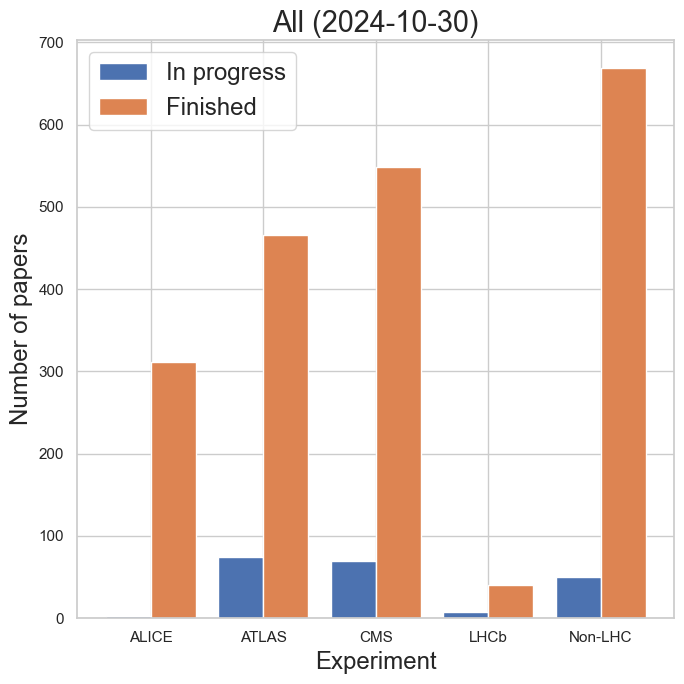

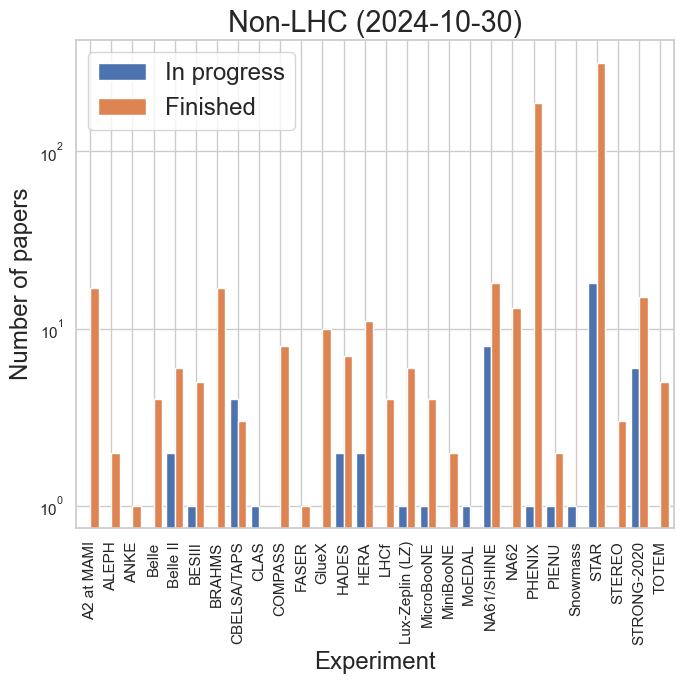

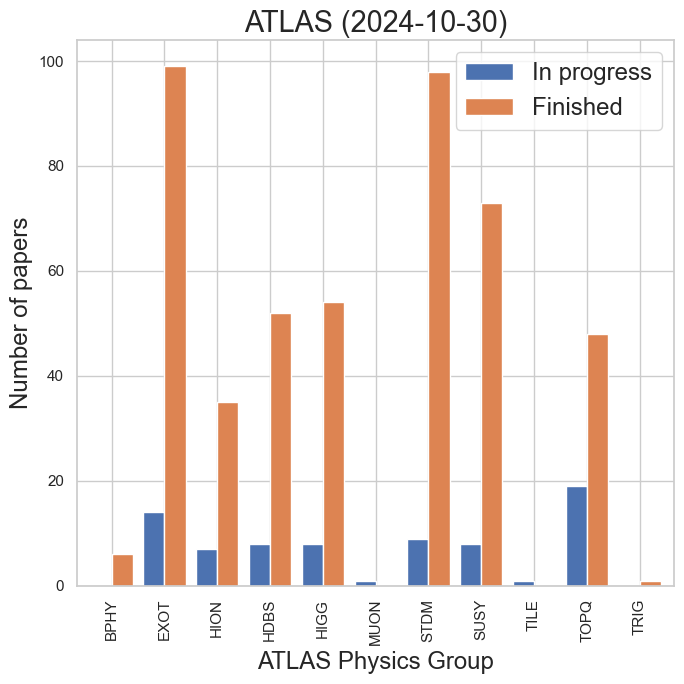

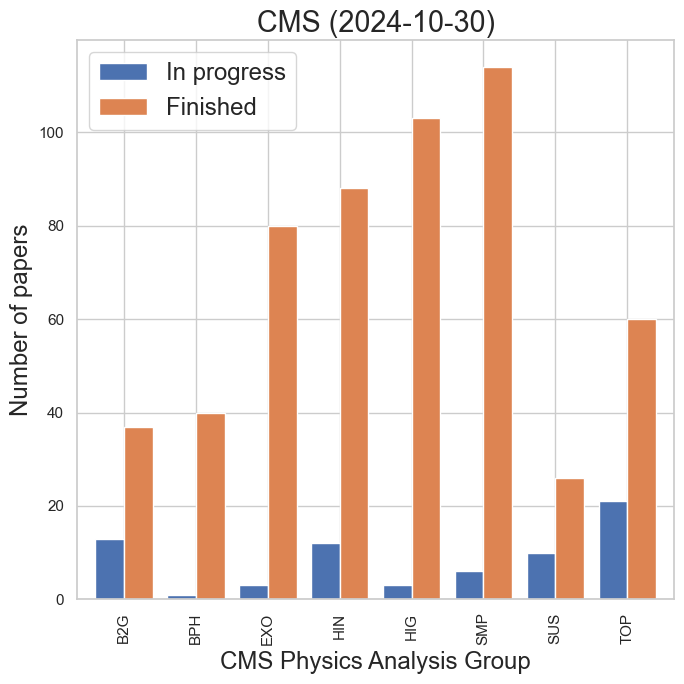

In [18]:
experiments = ['All', 'Non-LHC', 'ATLAS', 'CMS']
for sub in range(1, 5):
    plt.figure(facecolor='white', figsize=(7,7))
    ax = plt.subplot()
    experiment = experiments[sub-1]
    if experiment == 'All':
        df_experiment.plot(kind='bar', rot=0, ax=ax, width=0.8)
        plt.xlabel('Experiment', fontsize='x-large')
    else:
        df[df['Experiment'] == experiment].plot(kind='bar', rot=90, ax=ax, width=0.8)
        if experiment == 'ATLAS':
            plt.xlabel('ATLAS Physics Group', fontsize='x-large')
        elif experiment == 'CMS':
            plt.xlabel('CMS Physics Analysis Group', fontsize='x-large')
        else:
            plt.yscale("log")  # due to large number of STAR submissions
            plt.xlabel('Experiment', fontsize='x-large')
    plt.ylabel('Number of papers', fontsize='x-large')
    plt.title('{} ({})'.format(experiment, date), fontsize='xx-large')
    plt.legend(fontsize='x-large')
    plt.tight_layout()
    plt.savefig('submissions_{}_{}.png'.format(experiment, date))
    plt.show()